# **TikTok Claims Classification Project: Complete EDA**

<img src="../Images/bubble_logo.png" alt="Logo" style="float:left; width:120px; height:120px;">

## **Introduction**

The goal of this comprehensive exploratory data analysis (EDA) is to thoroughly investigate the TikTok claims classification dataset, building upon the initial insights gained in the preliminary analysis. This complete EDA involves structuring and cleaning the data, followed by an in-depth exploration of key variables to uncover relationships and trends that distinguish claim videos from opinion videos.

The EDA process is structured to progressively deepen the analysis, culminating in actionable insights that will guide the next steps in the project.

<br>

## **Dataset Exploration**

* Import packages and upload dataset
* Initial Inspection

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
df = pd.read_csv(r'C:\Users\danet\Documents\tiktok_dataset.csv')

In [4]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
print(f"Total Elements: {df.size:,}")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")

Total Elements: 232,584
Total Rows: 19,382
Total Columns: 12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [12]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


***Insights***

The dataset has been inspected, and it remains consistent with the state observed during the preliminary EDA. No changes or updates have been made to the data since the initial analysis. Therefore, the previous findings and assumptions about the dataset still apply.

<br>

## **Data Cleaning**

***Handle Missing Values:***
 In any data analysis project, identifying and handling null values is a crucial step to ensure the accuracy and reliability of the results. Null values, or missing data, can lead to biased outcomes, skew the analysis, and potentially reduce the performance of machine learning models. By detecting and quantifying null values in the dataset, we can make informed decisions on how to handle them appropriately.

In [16]:
# Determine the total number of elements, and count the columns and rows with null values
# Decide whether dropping rows or columns will result in the least data loss

total_rows, total_columns = df.shape
total_elements = df.size
missing_data = df.isnull().sum()

null_columns = (missing_data > 0).sum()
column_removal_proportion = (total_rows * null_columns) / total_elements * 100

null_rows = df.isnull().any(axis=1).sum()
row_removal_proportion = (null_rows * total_columns) / total_elements * 100

print(f"Total Elements: {total_elements}")
print(f"Total Columns with Missing Data: {null_columns}\n")
print(missing_data[missing_data > 0])
print(f"\nProportion of total elements deleted by removing all 7 columns: {column_removal_proportion:.2f}%")
print(f"Proportion of total elements deleted by removing all rows with missing values: {row_removal_proportion:.2f}%\n")

Total Elements: 232584
Total Columns with Missing Data: 7

claim_status                298
video_transcription_text    298
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Proportion of total elements deleted by removing all 7 columns: 58.33%
Proportion of total elements deleted by removing all rows with missing values: 1.54%



In [50]:
# Calculate the remaining elements if I were to drop null value columns or rows
null_row_removal = df.dropna(axis=0)
null_column_removal = df.dropna(axis=1)
print(f"Remaining Elements after dropping all columns with missing values: {null_column_removal.size}")
print(f"Remaining Elements after dropping all rows with missing values: {null_row_removal.size}\n")

Remaining Elements after dropping all columns with missing values: 96910
Remaining Elements after dropping all rows with missing values: 229008



***Insights***

* Since this project focuses on classifying claim status, and the claim_status column is missing data for 298 rows, it makes sense to drop these rows to maintain the integrity of the analysis
* Dropping rows with null values only reduces the dataset by 1.54%, which is a minimal loss and should not significantly impact the overall analysis
* I will revisit and confirm this decision during the model-building phase to ensure that it aligns with the requirements of the machine learning model and does not adversely affect its performance

<br>

***Check for Duplicates:***
 Identify and remove or investigate any duplicate entries to ensure the dataset’s integrity and avoid potential biases in the analysis.

In [20]:
print(f"Total Duplicates: {df.duplicated().sum()}")

Total Duplicates: 0


<br>

## **Data Validation Through Visualizations**

In this section, I extend the previous descriptive statistics by using boxplot and histogram visualizations to thoroughly assess the numerical elements of the dataset. The primary objectives are to understand the shape of the data distribution, identify potential outliers, and detect any skewness or clustering. By carefully examining these factors, I ensure that the data is well-understood and properly prepared for advanced statistical analysis, ultimately leading to more accurate and reliable results.

<br>

***Video Duration Seconds:***

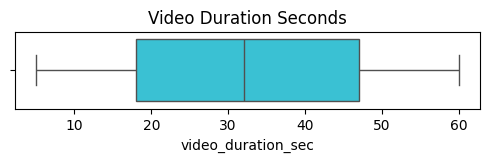

In [57]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['video_duration_sec'], color="#20D5EC")
plt.title('Video Duration Seconds');

***Insights***

* The distribution is relatively even, with a median of 32 seconds and an IQR ranging from 18 to 47 seconds
* No data points beyond the whiskers, indicating that there are no outliers

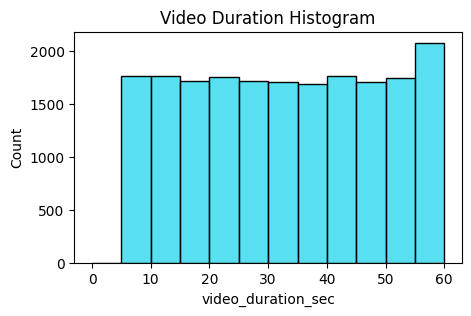

In [56]:
# Create a histogram to further explore the distribution of `video_duration_sec`
plt.figure(figsize=(5,3))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5), color="#20D5EC")
plt.title('Video Duration Histogram');

***Insight***

* All videos range from 5 to 60 seconds in length, with a generally uniform distribution, except for a slight increase in the 55-60 seconds range.

<br>

***Video View Count:***

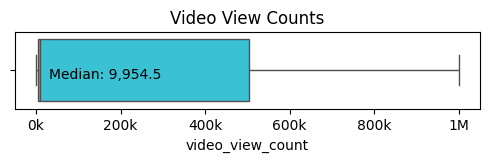

In [21]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['video_view_count'], color="#20D5EC")

median_value = df['video_view_count'].median()

plt.annotate(f'Median: {median_value:,}', 
             xy=(median_value, 0), 
             xytext=(median_value + 20000, 0.1),
             ha='left')

plt.xticks(ticks=range(0, 1000001, 200000), 
           labels=[f'{x//1000000}M' if x >= 1000000 else f'{x//1000}k' for x in range(0, 1000001, 200000)])

plt.title('Video View Counts');

***Insights***

* IQR ranges between roughly 5,000 and 500,000
* Half of the videos have view counts below 10,000

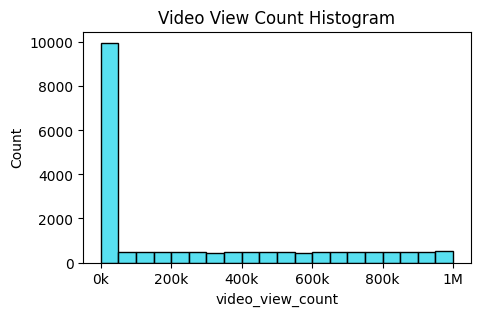

In [130]:
# Create a histogram to further explore the distribution of `video_view_count`
plt.figure(figsize=(5,3))
hist = sns.histplot(df['video_view_count'], bins=range(0,1000001,50000), color="#20D5EC")

plt.xticks(ticks=range(0, 1000001, 200000), 
           labels=[f'{x//1000000}M' if x >= 1000000 else f'{x//1000}k' for x in range(0, 1000001, 200000)])

plt.title('Video View Count Histogram');

***Insights***

* With the data is separated into 50,000 view intervals, the distribution is relatively even across intervals above 50,000 views
* A significant concentration is observed in the first bin, reflecting the fact that the median view count is below 10,000

<br>

***Video Like Count:***

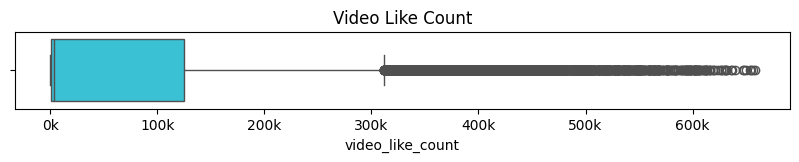

In [53]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_like_count'], color="#20D5EC")

plt.xticks(ticks=range(0, 660000, 100000), labels=[f'{x//1000}k' for x in range(0, 660000, 100000)])

plt.title('Video Like Count');

***Insight***

* The significant presence of densely packed outliers beyond the upper whisker suggests that while most videos have relatively low like counts, a smaller number have exceptionally high like counts, creating a skewed distribution

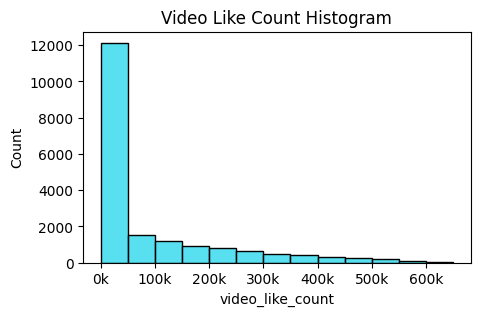

In [52]:
# Create a histogram to further explore the distribution of `video_like_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_like_count'], bins=range(0, 660000, 50000), color="#20D5EC")

plt.xticks(ticks=range(0, 660000, 100000), labels=[f'{x//1000}k' for x in range(0, 660000, 100000)])

plt.title('Video Like Count Histogram');

***Insight***

* Similar to the view count distribution, there is a significant concentration in the first 50,000 like count bin, followed by a sharp drop and a gradual tapering off

<br>

***Video Share Count:***

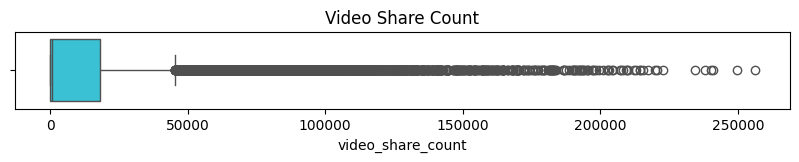

In [51]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_share_count'], color="#20D5EC")
plt.title('Video Share Count');

***Insights***

* IQR range of 115-18,222
* Significant presence of outliers beyond the upper fence value 45,382.5

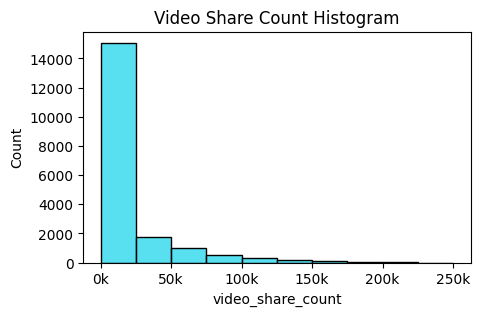

In [50]:
# Create a histogram to further explore the distribution of `video_share_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0, 260001, 25000), color="#20D5EC")

plt.xticks(ticks=range(0, 260001, 50000), labels=[f'{x//1000}k' for x in range(0, 260001, 50000)])

plt.title('Video Share Count Histogram');

***Insight***

* There is a high concentration of counts within the first 25,000 share count bin, followed by a sharp decline and a gradual tapering off

<br>

***Video Download Count:***

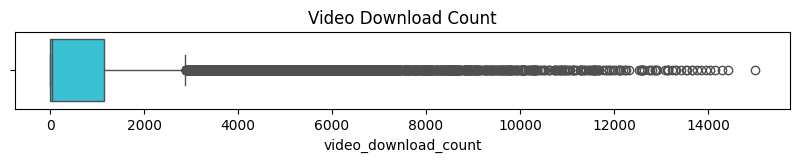

In [49]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_download_count'], color="#20D5EC")
plt.title('Video Download Count');

***Insights***

* The IQR ranges from 7 to 1,156, with a median of 46 downloads
* With the upper fence value at 2,880.125, the presence of outliers is evident

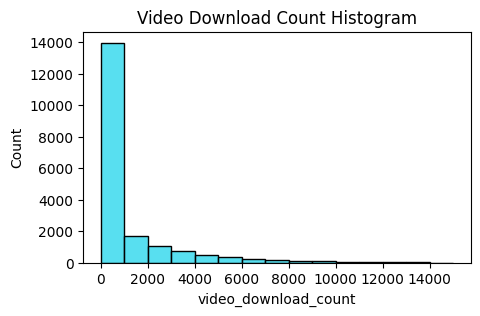

In [48]:
# Create a histogram to further explore the distribution of `video_download_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_download_count'], bins=range(0, 15001, 1000), color="#20D5EC")
plt.title('Video Download Count Histogram');

***Insight***

* High concentration of counts within the first 1,000 download count bin, followed by a sharp decline and a gradual tapering off

<br>

***Video Comment Count:***

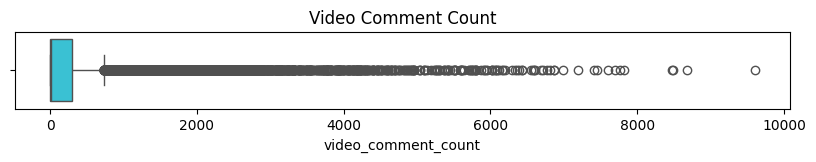

In [47]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_comment_count'], color="#20D5EC")
plt.title('Video Comment Count');

***Insights***

* IQR ranges from 1-292 comments, with a median of 9 comments
* A significant number of outliers present beyond the upper whisker

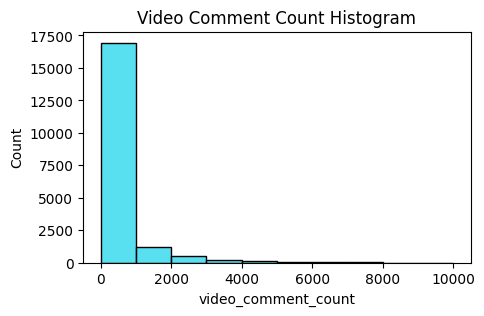

In [46]:
# Create a histogram to further explore the distribution of `video_comment_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_comment_count'], bins=range(0, 10001, 1000), color="#20D5EC")

plt.title('Video Comment Count Histogram');

***Insight***

* Again, the distribution shows a significant concentration in the first 500 comment count bin, followed by a sharp decline and gradual tapering off. With a median of 9, this is unsurprising

<br>

***Claim by Verification Status:***

claim_status  verified_status
claim         not verified       9399
              verified            209
opinion       not verified       8485
              verified            991
Name: count, dtype: int64


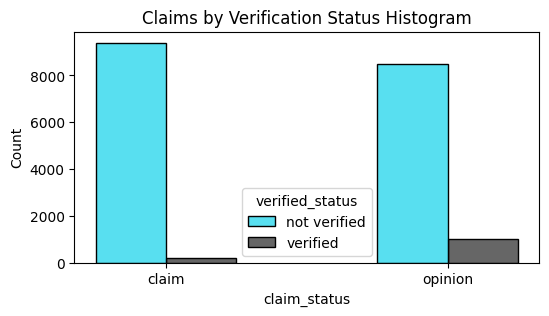

In [31]:
# When using 1-2 colours, on-brand colours are visually accessible and acceptable

print(df.groupby('claim_status')['verified_status'].value_counts())

plt.figure(figsize=(6,3))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.5,
             palette=['#20D5EC', '#333333'])
plt.title('Claims by Verification Status Histogram');

***Insights***

* The number of unverified users significantly exceeds the number of verified users
* Verified users are more likely to post opinions than claims

<br>

***Claim Status by Author Ban Status:***

claim_status  author_ban_status
claim         active               6566
              under review         1603
              banned               1439
opinion       active               8817
              under review          463
              banned                196
Name: count, dtype: int64


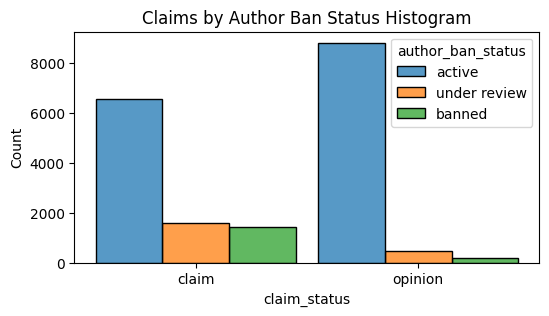

In [26]:
# All three on-brand colours are not aligned with accessibility requirements
# Opting for visually impaired-friendly colours in visualizations when using three or more colours

print(df.groupby('claim_status')['author_ban_status'].value_counts())

plt.figure(figsize=(6,3))
sns.histplot(data=df,
             x='claim_status',
             hue='author_ban_status',
             hue_order=['active', 'under review', 'banned'],
             multiple='dodge',
             shrink=0.9)

plt.title('Claims by Author Ban Status Histogram');

***Insights***

* Across both claim statuses, active authors are the clear majority, with active user opinions being the most prevalent
* However, there are significantly more claims made by under-review and banned authors, suggesting stricter moderation for claims

<br>

***Median View Counts by Author Ban Status:***

                  Median Video View Count Percentage
author_ban_status                                   
active                              8,616      1.05%
banned                            448,201     54.52%
under review                      365,246     44.43%



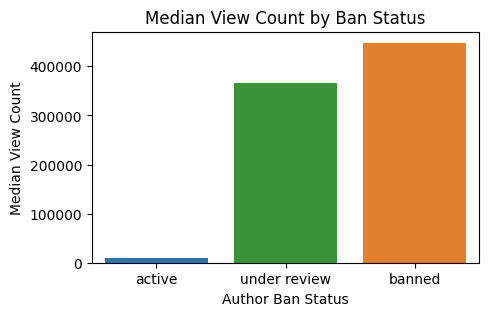

In [49]:
median_view_counts = df.groupby('author_ban_status')['video_view_count'].median()
total_median_view_count = median_view_counts.sum()
percentage = (median_view_counts / total_median_view_count * 100).round(2)
print(pd.DataFrame({
    'Median Video View Count': median_view_counts.apply(lambda x: f"{x:,.0f}"),
    'Percentage': percentage.apply(lambda x: f"{x:.2f}%")
}))
print()

median_ban_status = df.groupby(['author_ban_status'], as_index=False).median(numeric_only=True)

fig = plt.figure(figsize=(5,3))
sns.barplot(data=median_ban_status,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            hue='author_ban_status',
            dodge=False)

plt.title('Median View Count by Ban Status')
plt.ylabel('Median View Count')
plt.xlabel('Author Ban Status');

***Inisghts***

* Non-active users dominate median view counts
* Given that non-active users make more claims and their videos garner more attention, the video_view_count variable could be a strong indicator of claim status

An examination of the median view count by claim status supports this conclusion

In [17]:
df.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

<br>

***Total Views by Claim Status:***

In [46]:
view_count_sum = df.groupby('claim_status')['video_view_count'].sum()
percentage_proportion = (view_count_sum / view_count_sum.sum()) * 100

result_df = pd.DataFrame({
    'Total View Count': view_count_sum.apply(lambda x: f"{x:,.0f}"),
    'Percentage Proportion': percentage_proportion.apply(lambda x: f"{x:.2f}%")
})

result_df

,Total View Count,Percentage Proportion
claim_status,,
claim,"4,813,890,982",99.03%
opinion,"46,967,152",0.97%


Text(0.5, 1.0, 'Total Views by Claim Status')

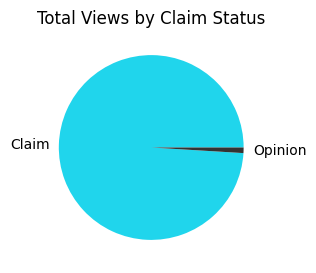

In [38]:
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(),
        labels=['Claim', 'Opinion'],
        colors=['#20D5EC', '#333333'])
plt.title('Total Views by Claim Status')

In [40]:
# Quick examination of all count columns by claim status
columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# Create a DataFrame to hold the results
results = {}

for column in columns:
    results[column] = df.groupby('claim_status')[column].sum().apply(lambda x: f"{x:,.0f}")

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)
results_df

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,
claim,"4,813,890,982","1,598,514,966","317,317,807","19,897,709","6,640,712"
opinion,"46,967,152","10,354,708","2,057,672","129,606","25,561"


***Insight***

* In the preliminary EDA, we observed that videos by claim status were relatively balanced
* However, the overall view count is overwhelmingly dominated by videos making claims
* Claim videos account for over 99% of all engagement metrics across all count categories, highlighting their dominant presence in the dataset

<br>

# **Determining Outliers**

In this section, I focus on identifying potential outliers within the TikTok dataset to prevent them from skewing the predictive model. As seen in the previous visualizations, the data aligns with typical social media behavior where a small number of videos receive disproportionately high engagement. However, outliers can still introduce bias, particularly in models predicting video view counts. To quantify these outliers, I’ll use the interquartile range (IQR) and adjust thresholds to account for the skewed distribution in the dataset, ensuring the model remains robust and reliable.

A common way to determine outliers in a normal distribution is to calculate the IQR and set a threshold at 1.5 * IQR above the 3rd quartile. However, as we've previously seen, the values for most count variables in this TikTok dataset are heavily skewed to the right. Due to this skewness, I will modify the outlier threshold by calculating the median value for each variable and then adding 1.5 * IQR.

This adjustment is important in preparation for creating a machine learning model because it helps prevent the model from being unduly influenced by extreme values that could skew predictions and reduce overall accuracy.

***Outlier Threshold: Median + 1.5 * IQR***

In [52]:
# Using a loop to identify outliers and determine the proportion in video interaction metrics
column_list = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

results = []

for column in column_list:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    outlier_counts = (df[column] > outlier_threshold).sum()
    proportion = (outlier_counts / len(df)) *100
    results.append([column, outlier_counts, f"{proportion:.2f}%"])

outlier_df = pd.DataFrame(results, columns=['Column', 'Total Median Outliers', 'Proportion'])
outlier_df

,Column,Total Median Outliers,Proportion
0,video_view_count,2343,12.09%
1,video_like_count,3468,17.89%
2,video_share_count,3732,19.25%
3,video_download_count,3733,19.26%
4,video_comment_count,3882,20.03%


***Insights***

* The proportion of outliers in each column is notably high. While a typical range of 1-5% is considered normal, exceeding 10% usually warrants intervention. Since all columns surpass this threshold, these outliers could significantly impact the model’s predictions
* Dropping all rows with outliers could drastically reduce the dataset, potentially affecting the overall analysis
* I will carefully address these outliers during the data preprocessing stage to ensure the model's performance remains accurate and reliable

<br>

***Scatterplot Distributions***

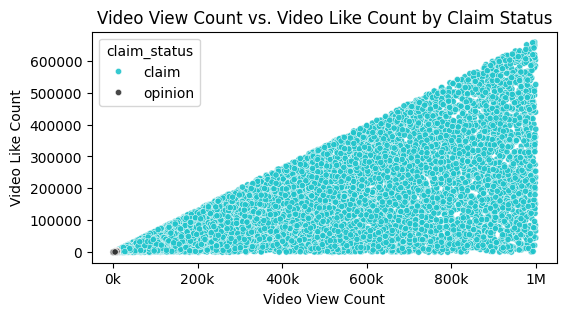

In [24]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, 
                x='video_view_count', 
                y='video_like_count', 
                hue='claim_status',
                s=20,
                alpha=0.9,
                palette=['#20c4cb', '#333333'])

plt.xticks(ticks=range(0, 1000001, 200000), 
           labels=[f'{x//1000000}M' if x >= 1000000 else f'{x//1000}k' for x in range(0, 1000001, 200000)])

plt.title('Video View Count vs. Video Like Count by Claim Status')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count');

***Insights***

* There is a strong positive correlation between video view counts and like counts, with higher view counts typically leading to more likes, as expected in social media metrics
* The majority of data points are in the "claim" category, indicating that these videos are either more common or receive more engagement than "opinions" in the dataset

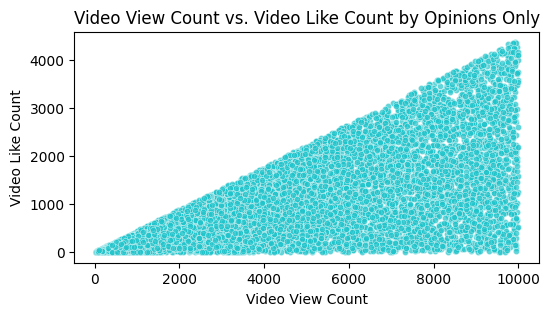

In [25]:
opinions = df[df['claim_status'] == 'opinion']

plt.figure(figsize=(6, 3))
sns.scatterplot(x=opinions['video_view_count'], 
                y=opinions['video_like_count'], 
                s=20,
                alpha=0.7,
                color='#20c4cb')

plt.title('Video View Count vs. Video Like Count by Opinions Only')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count');

***Insight***

* A clear positive correlation between video view counts and like counts

<br>


## **Summarize Findings:**

Outliers' Impact on Model Prediction

* The high proportion of outliers remains crucial, as they could disproportionately affect the model's performance, especially since claim videos dominate the dataset.

Dominance of Claim Status Videos

* The fact that claim videos account for over 99% of engagement metrics underscores this insight, confirming that understanding claim videos is critical to building a successful model.

Correlation Between View Counts and Claim Status

* Given that claim videos are the overwhelming majority in terms of engagement, the correlation between view counts and claim status is even more significant as a predictive feature.

Author Status Influence

* The significant presence of claims from under-review and banned authors, coupled with their high engagement, reinforces the importance of including author status as a key feature.

***Note -*** We will need to address key considerations, such as handling outliers and missing data before proceeding with model design.